<a href="https://colab.research.google.com/github/WilliamGaryDawkins/CS631-Project/blob/main/CS631_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install pyspark
!pip install pyspark

In [2]:
#create the spark session so we can work with spark dataframes
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat,concat_ws
import random
spark = SparkSession.builder.appName("YourTest").master("local[2]").config('spark.ui.port', random.randrange(4000,5000)).getOrCreate()

In [3]:
#from pyspark.sql.functions import concat, col, lit
%matplotlib inline
import requests
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import *
from pyspark.sql.functions import col
from pyspark.sql.functions import lit

In [4]:
#Read in CSV files and create raw data frames
games_raw = spark.read.csv("/content/drive/My Drive/NHL Dataset/game.csv",header=True,inferSchema=True)
game_goalie_stats_raw = spark.read.csv("/content/drive/My Drive/NHL Dataset/game_goalie_stats.csv",header=True,inferSchema=True)
game_plays_raw =spark.read.csv("/content/drive/My Drive/NHL Dataset/game_plays.csv",header=True,inferSchema=True)
game_plays_players_raw = spark.read.csv("/content/drive/My Drive/NHL Dataset/game_plays_players.csv",header=True,inferSchema=True)
game_shifts_raw = spark.read.csv("/content/drive/My Drive/NHL Dataset/game_shifts.csv",header=True,inferSchema=True)
game_skater_stats_raw =spark.read.csv("/content/drive/My Drive/NHL Dataset/game_skater_stats.csv",header=True,inferSchema=True)
game_teams_stats_raw = spark.read.csv("/content/drive/My Drive/NHL Dataset/game_teams_stats.csv",header=True,inferSchema=True)
player_info_raw = spark.read.csv("/content/drive/My Drive/NHL Dataset/player_info.csv",header=True,inferSchema=True)
team_info_raw = spark.read.csv("/content/drive/My Drive/NHL Dataset/team_info.csv",header=True,inferSchema=True)

In [5]:
## Create cleaner data frames, removing columns that wont be of interest (time of day,timezone info, venue location, links). 
## Note: Most dataframes do not have info we want to drop

games = games_raw.drop("date_time_GMT","venue_link","venue_time_zone_id","venue_time_zone_offset","venue_time_zone_tz").cache() 
game_goalie_stats = game_goalie_stats_raw.cache()
game_plays = game_plays_raw.cache()
game_plays_players = game_plays_players_raw.cache()
game_shifts = game_shifts_raw.cache()
game_skater_stats = game_skater_stats_raw.cache()
game_teams_stats = game_teams_stats_raw.cache()
player_info = player_info_raw.drop("link").cache()
team_info = team_info_raw.drop("link").cache()

##add point total to player stats
game_skater_stats = game_skater_stats.withColumn("points", col("goals")+col("assists")).cache()

In [6]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_rink(ax=None, color='black', lw=2):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()


    center_faceoff = Circle((0, 0), radius=1, linewidth=lw, color='blue', fill=True)
    
    zone_faceoff_1 = Circle((69, 22), radius=1, linewidth=lw, color='red', fill=True)
    zone_faceoff_2 = Circle((-69, 22), radius=1, linewidth=lw, color='red', fill=True)
    zone_faceoff_3 = Circle((69, -22), radius=1, linewidth=lw, color='red', fill=True)
    zone_faceoff_4 = Circle((-69, -22), radius=1, linewidth=lw, color='red', fill=True)

    neutral_faceoff_1 = Circle((20, 22), radius=1, linewidth=lw, color='red', fill=True)
    neutral_faceoff_2 = Circle((-20, 22), radius=1, linewidth=lw, color='red', fill=True)
    neutral_faceoff_3 = Circle((20, -22), radius=1, linewidth=lw, color='red', fill=True)
    neutral_faceoff_4 = Circle((-20, -22), radius=1, linewidth=lw, color='red', fill=True)



    center_circle = Circle((0,0), radius = 15, linewidth=lw, color='blue', fill= False)
    zone_circle_1 = Circle((69,22), radius = 15, linewidth=lw, color='red', fill= False)
    zone_circle_2 = Circle((-69,22), radius = 15, linewidth=lw, color='red', fill= False)
    zone_circle_3 = Circle((69,-22), radius = 15, linewidth=lw, color='red', fill= False)
    zone_circle_4 = Circle((-69,-22), radius = 15, linewidth=lw, color='red', fill= False)                                              

    blue_line1 = Rectangle((-25,-42.5), 0, 85,linewidth=lw,color='blue',fill=False)
    blue_line2 = Rectangle(( 25,-42.5), 0, 85,linewidth=lw,color='blue',fill=False)
    center_line = Rectangle((0,-42.5), 0, 85,linewidth=lw,color='red',fill=False)
   
    goal_line1 = Rectangle((-89,-40.5), 0, 81,linewidth=lw,color='red',fill=False)
    goal_line2 = Rectangle((89,-40.5), 0, 81,linewidth=lw,color='red',fill=False)

    goal_crease1 = Arc((-89,0),8,8,angle=270,theta1=0,theta2=180,color='red')
    goal_crease2 = Arc((89,0),8,8,angle=90,theta1=0,theta2=180,color='red')
    
    top_border = Rectangle((-85,42.5), 170, 0,linewidth=lw,color='black',fill=False)
    bottom_border = Rectangle((-85,-42.5), 170, 0,linewidth=lw,color='black',fill=False)
    left_border = Rectangle((-100,-27), 0, 54,linewidth=lw,color='black',fill=False)
    right_border = Rectangle((100,-27), 0, 54,linewidth=lw,color='black',fill=False)

    bottom_right_corner = Arc((-87.5,-30.1),29,20,angle=135,theta1=22,theta2=155,linewidth=lw)
    top_right_corner = Arc((-87.5,30.1),29,20,angle=45,theta1=22,theta2=155,linewidth=lw)
    top_left_corner = Arc((87.5,30.1),29,20,angle=315,theta1=22,theta2=155,linewidth=lw)
    bottom_left_corner = Arc((87.5,-30.1),29,20,angle=225,theta1=22,theta2=155,linewidth=lw)
  
    
    rink_elements = [center_faceoff,zone_faceoff_1,zone_faceoff_2,zone_faceoff_3,zone_faceoff_4,
                      center_circle,zone_circle_1,zone_circle_2,zone_circle_3,zone_circle_4,
                      blue_line1,blue_line2,center_line,neutral_faceoff_1,neutral_faceoff_2,neutral_faceoff_3,
                      neutral_faceoff_4,goal_line1,goal_line2,goal_crease1,goal_crease2,top_border,bottom_border,
                      left_border,right_border,bottom_right_corner,top_right_corner,top_left_corner,bottom_left_corner]

    # Add the rink elements onto the axes
    for element in rink_elements:
        ax.add_patch(element)

    return ax

def draw_Ozone(ax=None, color='black', lw=2):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()


    center_faceoff = Circle((0, 0), radius=1, linewidth=lw, color='blue', fill=True)
    zone_faceoff_1 = Circle((22, 69), radius=1, linewidth=lw, color='red', fill=True)
    zone_faceoff_2 = Circle((-22, 69), radius=1, linewidth=lw, color='red', fill=True)

    neutral_faceoff_1 = Circle((22, 20), radius=1, linewidth=lw, color='red', fill=True)
    neutral_faceoff_2 = Circle((-22, 20), radius=1, linewidth=lw, color='red', fill=True)

    
    center_circle = Circle((0,0), radius = 15, linewidth=lw, color='blue', fill= False)
    zone_circle_1 = Circle((22,69), radius = 15, linewidth=lw, color='red', fill= False)
    zone_circle_2 = Circle((-22,69), radius = 15, linewidth=lw, color='red', fill= False)                                          

    blue_line1 = Rectangle((-42.5,25), 85, 0,linewidth=lw,color='blue',fill=False)
    
    goal_line1 = Rectangle((-41,89), 82, 0,linewidth=lw,color='red',fill=False)

    goal_crease2 = Arc((0,89),8,8,angle=180,theta1=0,theta2=180,color='red')
    
    top_border = Rectangle((42.5,0), 0, 85,linewidth=lw,color='black',fill=False)
    bottom_border = Rectangle((-42.5,0), 0, 85,linewidth=lw,color='black',fill=False)

    right_border = Rectangle((-27,100), 54, 0,linewidth=lw,color='black',fill=False)

    bottom_right_corner = Arc((30.1,87.5),29,20,angle=315,theta1=22,theta2=155,linewidth=lw)
    top_right_corner = Arc((-30.1,87.5),29,20,angle=45,theta1=22,theta2=155,linewidth=lw)
  
    
    rink_elements = [zone_faceoff_1,zone_faceoff_2,
                      zone_circle_1,zone_circle_2, neutral_faceoff_1,neutral_faceoff_2,
                      blue_line1,center_faceoff,center_circle,
                      goal_line1,goal_crease2,top_border,bottom_border,
                      right_border,bottom_right_corner,top_right_corner]

    # Add the rink elements onto the axes
    for element in rink_elements:
        ax.add_patch(element)

    return ax

# Interactive Ranking by Stats plot

In [7]:
def ranked_by_stats_by_season_skater(season,stat,game_type):
  players_ranked_skaters_dtf = game_skater_stats.join(player_info, "player_id").join(games, "game_id").filter("season = {0}".format(season)).filter("type = '{0}'".format(game_type)).select("player_id","{0}".format(stat)).groupBy("player_id").sum("{0}".format(stat)).join(player_info,"player_id").orderBy("sum({0})".format(stat),ascending=False).select(concat("firstName",lit(" "),"lastName").alias("FullName"),"sum({0})".format(stat))
  return players_ranked_skaters_dtf

In [8]:
def update_stats_plot(season,stat,game_type,top_num):
  
  pdf = ranked_by_stats_by_season_skater(season,stat,game_type).limit(top_num).toPandas()
 # pdf.plot.barh(x='FullName',y="sum({0})".format(stat))
  plt.figure(figsize=(20,10))
  ax = sns.barplot(y=pdf['FullName'],x=pdf["sum({0})".format(stat)],palette='deep')
  ax.set_xlabel('{0}'.format(stat),fontsize=15)
  ax.set_ylabel('')
  plt.title('Top {0} Players by {1} in the {2} NHL Season'.format(top_num,stat,season),y=1.05,fontsize=40)
  if game_type == 'R':
    plt.suptitle('Regular Season',y=0.90,fontsize=15)
  else:
    plt.suptitle('Playoffs',y=0.90,fontsize=15)  
  plt.show()

interact(update_stats_plot,
         season=widgets.Dropdown(options=[20112012,20122013,20132014,20142015,20152016,20162017,20172018,20182019]),
         stat=widgets.Dropdown(options=['points','goals','assists','shots','hits','powerPlayGoals','powerPlayAssists','timeOnIce','penaltyMinutes','faceOffWins','faceoffTaken','takeaways','giveaways','shortHandedGoals','shortHandedAssits','blocked','plusMinus','evenTimeOnIce','powerPlayTimeOnIce','shortHandedTimeOnIce']),
         game_type=widgets.Dropdown(options=["R","P"]),
         top_num=widgets.IntSlider(value=20,min=1,max=200,step=1))


interactive(children=(Dropdown(description='season', options=(20112012, 20122013, 20132014, 20142015, 20152016…

<function __main__.update_stats_plot>

# Team Standings for a Given Season

In [60]:
def point_calc(won,settled):
  if won == True:
    points = 2
  elif (won == False) & (settled == 'OT'):
    points = 1
  elif (won == False) & (settled == 'SO'):
    points = 1 
  else:
    points = 0
  return points

point_calc_udf = udf(point_calc,'Int') 

In [77]:
from pyspark.sql.functions import udf
points_of_teams = game_teams_stats.select('game_id','team_id','won','settled_in').join(team_info.select('team_id','shortName','teamName'),'team_id').join(games.select('game_id','season','type'),'game_id').filter("type='R'")
points_of_teams = points_of_teams.withColumn('points',point_calc_udf(points_of_teams['won'],points_of_teams['settled_in'])).groupBy('teamName','season').sum('points').withColumnRenamed('sum(points)','points').cache()
#points_of_teams.show()
#pdf = points_of_teams.filter('season = {0}'.format(20122013)).show()
#display(pdf)

In [82]:
def update_standings_plot(season):
  
  pdf = points_of_teams.filter('season = {0}'.format(season)).orderBy('points',ascending=False).toPandas()
  plt.figure(figsize=(20,10))
  ax = sns.barplot(y=pdf['teamName'],x=pdf['points'],palette='deep')
  ax.set_xlabel('Points',fontsize=15)
  ax.set_ylabel('')
  plt.title('Standings of the {0} NHL Regular Season'.format(season),y=1.05,fontsize=40)
  plt.show()

interact(update_standings_plot,
         season=widgets.Dropdown(options=[20112012,20122013,20132014,20142015,20152016,20162017,20172018,20182019]),
         )

interactive(children=(Dropdown(description='season', options=(20112012, 20122013, 20132014, 20142015, 20152016…

<function __main__.update_standings_plot>

# World Map of NHL Player's Nationalities

In [ ]:
pip install geopandas

In [10]:
import geopandas

In [11]:
def skaters_nationalities_by_season():
  player_nationality_dtf = game_skater_stats.join(player_info, "player_id").join(games, "game_id").select("player_id","nationality","season").dropDuplicates(["player_id","season"]).groupBy("nationality","season").count().withColumnRenamed("count", "player count")
  return player_nationality_dtf

def goalies_nationalities_by_season():
  goalie_nationality_dtf = game_goalie_stats.join(player_info, "player_id").join(games, "game_id").select("player_id","nationality","season").dropDuplicates(["player_id","season"]).groupBy("nationality","season").count().withColumnRenamed("count", "player count")
  return goalie_nationality_dtf 

In [13]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [14]:
world.columns=['pop_est', 'continent', 'name', 'nationality', 'gdp_md_est', 'geometry']
players_ntls_skaters = skaters_nationalities_by_season().toPandas()
players_ntls_goalies = goalies_nationalities_by_season().toPandas()

In [43]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
cmap2 = plt.cm.Purples


def update_world_plot(given_season,player_type):
  
  if player_type == 'all':
    players_ntls = nationalities_by_season_total(season).toPandas()
  elif player_type == 'skaters':
    players_ntls = players_ntls_skaters[(players_ntls_skaters.season==given_season)]
  elif player_type == 'goalies':
    players_ntls = players_ntls_goalies[(players_ntls_goalies.season==given_season)]
  

 # world.columns=['pop_est', 'continent', 'name', 'nationality', 'gdp_md_est', 'geometry']
  players_ntls.columns=['nationality','season','player_count']
  merged = world.merge(players_ntls,on=['nationality'],how='left').fillna(0)

  ax = merged.plot(column='player_count',cmap='YlGnBu',figsize=(20,25),legend=True,legend_kwds={'orientation':'horizontal','pad': 0,'label': 'Number of Players'},
              facecolor='blue')
  ax.set_facecolor(cmap2(0.1))
  plt.title('Countries by NHL Player Nationalities',fontsize=40)
  plt.show()


  

plot= interact(update_world_plot,
         given_season=widgets.Dropdown(options=[20112012,20122013,20132014,20142015,20152016,20162017,20172018,20182019]),
         player_type=widgets.Dropdown(options=["skaters","goalies"]))

plot

interactive(children=(Dropdown(description='given_season', options=(20112012, 20122013, 20132014, 20142015, 20…

<function __main__.update_world_plot>

# Individual Player Offensive Scatter plots/Heatmaps

In [16]:
game_plays_shots = game_plays.filter("event = 'Shot'").select('play_id','game_id','event','st_x','st_y').join(games.select('game_id','season'),'game_id').join(game_plays_players.select('play_id','player_id'),'play_id').join(player_info.select('player_id','firstName','LastName'),'player_id').withColumn('fullName', concat_ws(' ','firstname','lastName')).cache()
game_plays_goals = game_plays.filter("event = 'Goal'").select('play_id','game_id','event','st_x','st_y').join(games.select('game_id','season'),'game_id').join(game_plays_players.select('play_id','player_id'),'play_id').join(player_info.select('player_id','firstName','LastName'),'player_id').withColumn('fullName', concat_ws(' ','firstname','lastName')).cache()

In [44]:
def update_offensive_plot(season,name,stat,plot_type):
  
  if plot_type == 'scatter plot':
    if stat == 'Goals':
      Player_stats_df = game_plays_goals.filter("season = {0}".format(season)).filter("fullName = '{0}'".format(name)).select('st_x','st_y').toPandas().astype(float) 
    elif stat == 'Shots':
      Player_stats_df_shots = game_plays_shots.filter("season = {0}".format(season)).filter("fullName = '{0}'".format(name)).select('st_x','st_y').toPandas().astype(float)  
      Player_stats_df_goals = game_plays_goals.filter("season = {0}".format(season)).filter("fullName = '{0}'".format(name)).select('st_x','st_y').toPandas().astype(float)
      Player_stats_df = Player_stats_df_shots.append(Player_stats_df_goals, ignore_index=True)
  
    plt.figure(figsize=(12,12))
    plt.scatter(Player_stats_df.st_y*-1,Player_stats_df.st_x)
    draw_Ozone()
    plt.xlim(-42.5,42.5)
    plt.ylim(0,100)
    plt.tick_params(labelbottom=False,labelleft=False)
    plt.show()
  
  elif plot_type == 'heat map':
    
    if stat == 'Goals':
      Player_stats_df = game_plays_goals.filter("season = {0}".format(season)).filter("fullName = '{0}'".format(name)).select('st_x','st_y').toPandas().astype(float) 
    elif stat == 'Shots':
      Player_stats_df_shots = game_plays_shots.filter("season = {0}".format(season)).filter("fullName = '{0}'".format(name)).select('st_x','st_y').toPandas().astype(float)  
      Player_stats_df_goals = game_plays_goals.filter("season = {0}".format(season)).filter("fullName = '{0}'".format(name)).select('st_x','st_y').toPandas().astype(float)
      Player_stats_df = Player_stats_df_shots.append(Player_stats_df_goals, ignore_index=True)
    cmap=plt.cm.Blues
    
    joint_stats_plot = sns.jointplot(x=Player_stats_df.st_y*-1,y=Player_stats_df.st_x,
                                 kind='kde',space=0,n_levels=50,cmap=cmap,color=cmap(0.8),shade=True,thresh=0,
                                 fill=True)

    joint_stats_plot.fig.set_size_inches(12,12)

    ax = joint_stats_plot.ax_joint
    draw_Ozone(ax)
    ax.set_xlim(-42.5,42.5)
    ax.set_ylim(0,100)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_facecolor(cmap(0))
    ax.tick_params(labelbottom=False,labelleft=False)


    plt.show()


plot= interact(update_offensive_plot,
         season=widgets.Dropdown(options=[20112012,20122013,20132014,20142015,20152016,20162017,20172018,20182019]),
         stat=widgets.Dropdown(options=["Goals","Shots"]),
         plot_type=widgets.Dropdown(options=["scatter plot","heat map"]),
         name = widgets.Text())

interactive(children=(Dropdown(description='season', options=(20112012, 20122013, 20132014, 20142015, 20152016…

In [ ]:
def PlotGameEvents(team,season,date):
  newDF = games.join(game_team_stats,'game_id').join(team_info,'team_id').filter("season={0}".format(season))
  return newDF
season = '20112012'
team = 'Devils'
date='2012-02-13'
SelectedGameInfo = games.select('game_id','season','date_time','away_team_id','home_team_id').filter("season={0}".format(season)).filter("date_time= '{0}'".format(date)).join(game_teams_stats.select('game_id','team_id'),'game_id').join(team_info,'team_id').filter("teamName = 'Blues'")
#SelectedGameInfo.show()
home_team_info = SelectedGameInfo.select('home_team_id').withColumnRenamed("home_team_id","team_id").join(team_info,'team_id')
away_team_info = SelectedGameInfo.select('away_team_id').withColumnRenamed("away_team_id","team_id").join(team_info,'team_id')
#home_team_info.show()
#away_team_info.show()
SelectedGameData = SelectedGameInfo.select('game_id').join(game_plays.select('game_id','event','team_id_for','st_x','st_y'),'game_id').withColumnRenamed('team_id_for','team_id').filter("event = 'Shot'")
home_team_data = home_team_info.join(SelectedGameData, 'team_id').select('st_x','st_y')
away_team_data = away_team_info.join(SelectedGameData, 'team_id').select('st_x','st_y')
home_team_DF = home_team_data.toPandas().astype(float)
away_team_DF = away_team_data.toPandas().astype(float).apply(lambda x: x*-1)

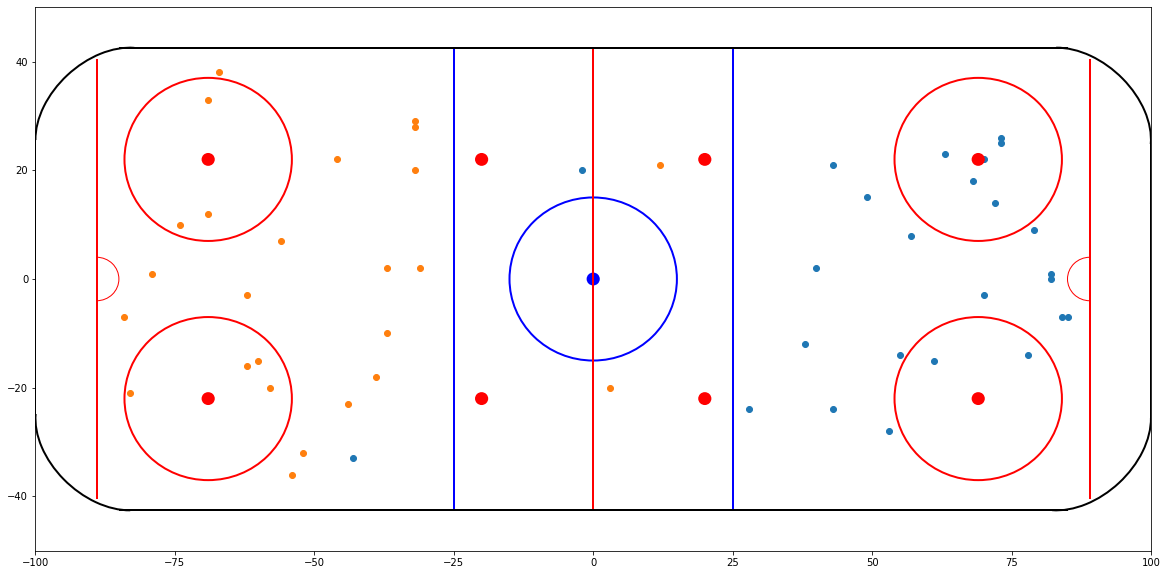

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(home_team_DF.st_x,home_team_DF.st_y)
plt.scatter(away_team_DF.st_x,away_team_DF.st_y)
draw_rink()
plt.xlim(-100,100)
plt.ylim(-50,50)
plt.show()
